In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
# ---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
# ------------------- progress bar
from tqdm import tqdm
# ------------------- hide warning
import warnings
warnings.filterwarnings('ignore')
from graph_package.src.etl.feature_engineering.drug_features import get_drug_SMILES_repr, get_molecules_from_SMILES, get_feature_path

In [7]:
drug_SMILES, drug_names = get_drug_SMILES_repr()
mols = get_molecules_from_SMILES(drug_SMILES)
save_path = get_feature_path()
###


pd_smiles = pd.DataFrame(drug_SMILES, columns=["SMILES"])
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(pd_smiles, 'SMILES', 'Structure')
pd_smiles.head()



,SMILES,Structure
0,C(CC(=O)O)C(=O)CN.Cl,<rdkit.Chem.rdchem.Mol object at 0x000001E7010...
1,C1=C(C(=O)NC(=O)N1)F,<rdkit.Chem.rdchem.Mol object at 0x000001E7010...
2,C1=NC2=C(N1)C(=S)N=CN2,<rdkit.Chem.rdchem.Mol object at 0x000001E7010...
3,C1=NC2=C(N1)C(=S)N=C(N2)N,<rdkit.Chem.rdchem.Mol object at 0x000001E7010...
4,CC12CCC(CC1=CCC3C2CCC4(C3CC=C4C5=CN=CC=C5)C)O,<rdkit.Chem.rdchem.Mol object at 0x000001E7010...


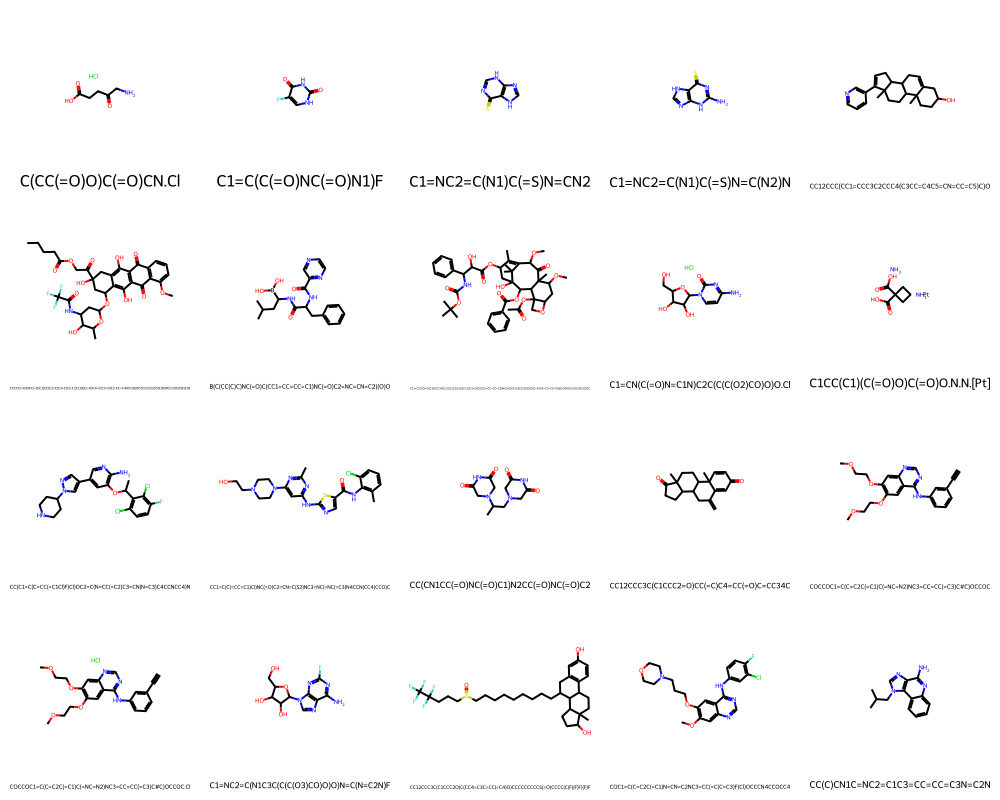

In [8]:
#visualize the first 20 molecules
Draw.MolsToGridImage([x for x in pd_smiles["Structure"]][:20], maxMols=100,
                     legends=[str(x) for x in pd_smiles.SMILES], subImgSize=(200, 200), molsPerRow=5)

In [70]:
onbits = {}
#calculate the average on bits for all the molecules
test = []
for i in range(len(pd_smiles)):
    mf = AllChem.GetMorganFingerprintAsBitVect(pd_smiles.Structure[i], 6, nBits=300, bitInfo=onbits)
    test.append(len(list(mf.GetOnBits())))

#extract length of on bits
#onbits = list(onbits.values())



    # print(np.array(mf), len(tuple(mf.GetOnBits())))  
  

In [71]:
#avg number of bits activated
sum(test)/len(test)

76.28915662650603

[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1] 75


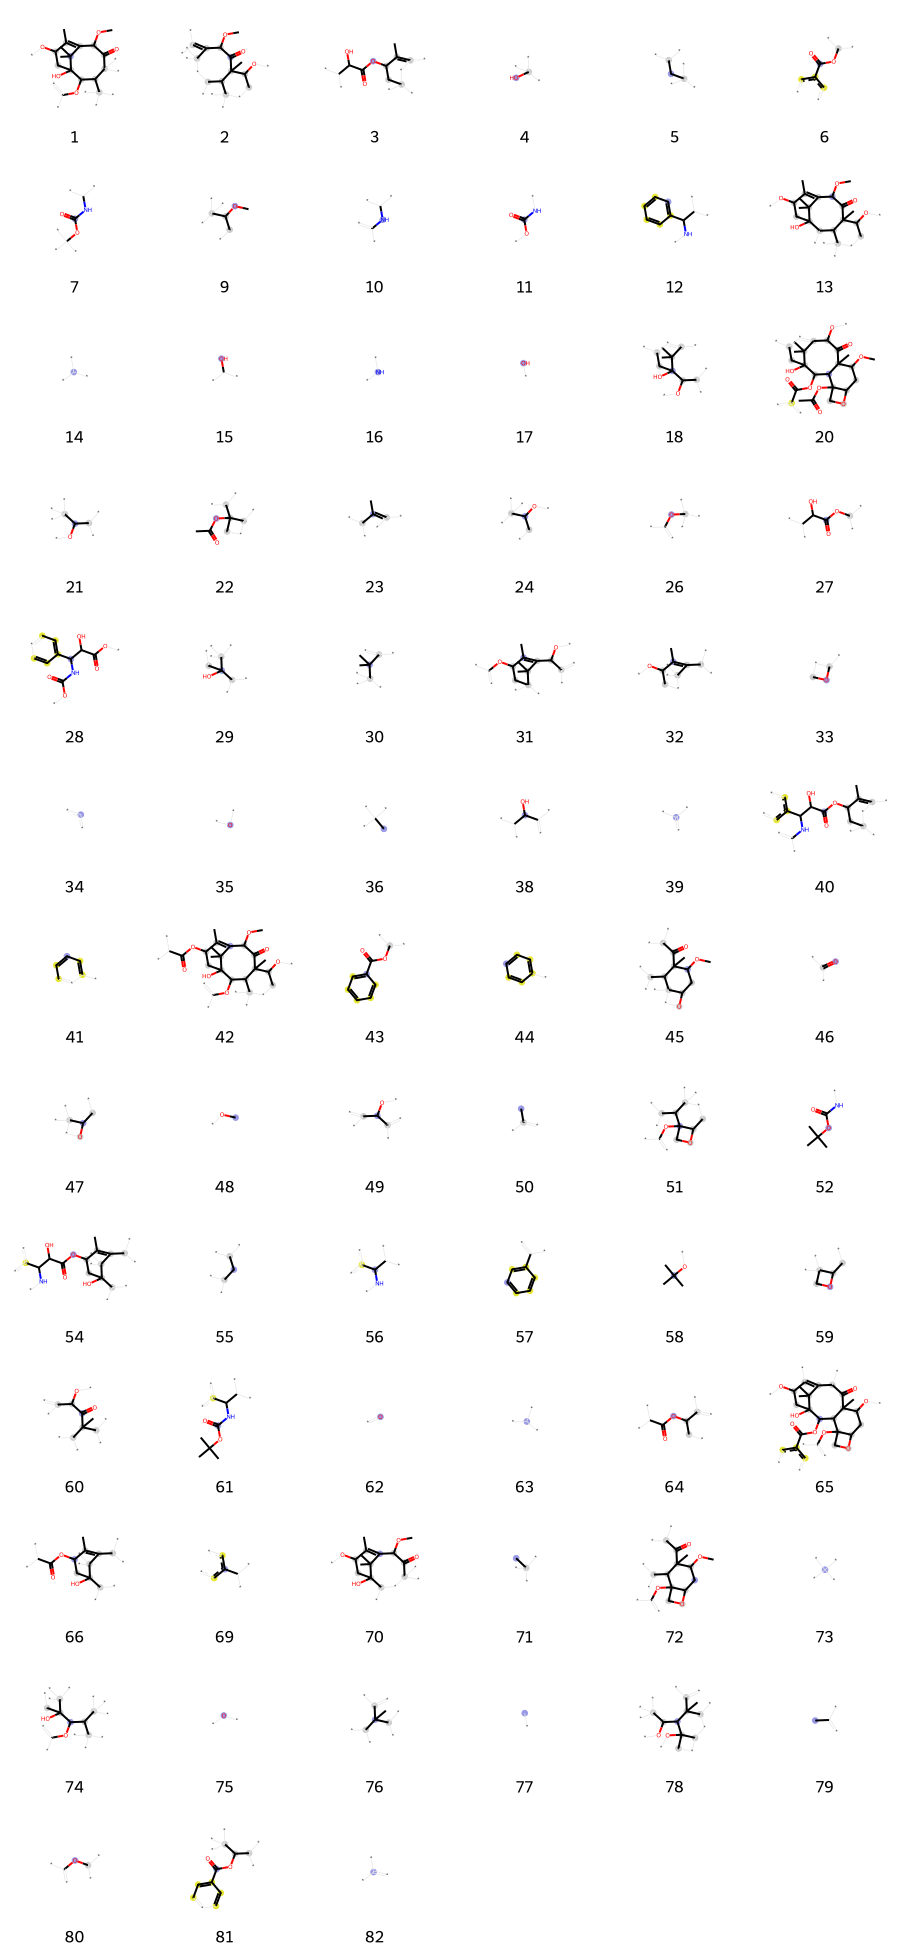

In [68]:
#visualize the on bits for a specific molecule
onbits = {}

mf = AllChem.GetMorganFingerprintAsBitVect(pd_smiles.Structure[7], 6, nBits=83, bitInfo=onbits)
print(np.array(mf), len(tuple(mf.GetOnBits())))

# Render all the fragments or features that are responsible for making ON bits
all_fragments = [(pd_smiles.Structure[7], x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=6, legends=[str(x) for x in mf.GetOnBits()][:])

